In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [140]:
# Paths to timings data
fenics_timings = "/home/cecile/dev/fenics-networks/applications/fenics/plots_perf/timings.txt"
fenicsx_timings = "/home/cecile/dev/networks_fenicsx/demos/demo_perf/timings.txt"

In [141]:
# Translate timings table into dictionnaries
df_fenics = pd.read_csv(fenics_timings, sep = "\t", index_col=0, header=0)
df_fenicsx = pd.read_csv(fenicsx_timings, sep = "\t", index_col=0)
fenics_dict = df_fenics.to_dict()
fenicsx_dict = df_fenicsx.to_dict()

In [142]:
def n_dict(d: dict):
    new_dict = dict()
    for i,n in enumerate(list(d["forms"].keys())):
        new_dict[n] = dict()
        for key in list(d.keys()):
            new_dict[n][key] = list(d[key].values())[i]
    return new_dict

In [143]:
# Transform initial dictionnary into {n: {forms: x, assembly: x, solve: x}, ... }
fenics_n_dict = n_dict(fenics_dict)
fenicsx_n_dict = n_dict(fenicsx_dict)
print("fenics_n_dict = ", fenics_n_dict)
print("fenicsx_n_dict = ", fenicsx_n_dict)

fenics_n_dict =  {2.0: {'forms': 3.623, 'assembly': 5.477, 'solve': 0.001}, 3.0: {'forms': 4.004, 'assembly': 7.478, 'solve': 0.002}, 4.0: {'forms': 6.449, 'assembly': 15.401, 'solve': 0.003}}
fenicsx_n_dict =  {2.0: {'forms': 1.418, 'assembly': 0.002, 'solve': 0.0}, 3.0: {'forms': 2.108, 'assembly': 0.004, 'solve': 0.001}, 4.0: {'forms': 2.108, 'assembly': 0.004, 'solve': 0.001}}


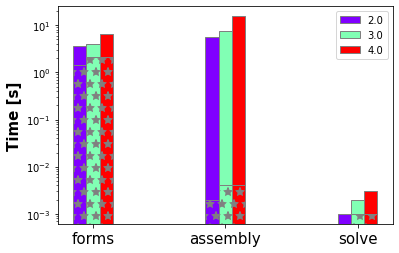

<Figure size 432x288 with 0 Axes>

In [149]:
# Bar plots

barWidth = 0.1

# Set position of bar on X axis
br = np.arange(len(list(fenics_n_dict.keys())))
br = [x - barWidth for x in br]

# Make the plot
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(br0))))
fig, ax = plt.subplots()

for i,n in enumerate(list(fenics_n_dict.keys())):
    c = next(color)
    ax.bar(br, fenics_n_dict[n].values(), color=c, width=barWidth,
                    edgecolor='grey', label=str(n))
    ax.bar(br, fenicsx_n_dict[n].values(), color=c, hatch="*", width=barWidth,
                    edgecolor='grey', label=None)
    br = [x + barWidth for x in br]

# Adding labels / ticks
xlabels = ["forms", "assembly", "solve"]
ax.set_ylabel('Time [s]', fontweight='bold', fontsize=15)
ax.set_xticks(range(len(list(fenics_n_dict.keys()))))
ax.set_xticklabels(xlabels, fontsize=15)
ax.legend()

ax.set_yscale('log')

plt.show()
plt.savefig("/home/cecile/dev/networks_fenicsx/demos/demo_perf/timings_comp.png")

